In [2]:
%matplotlib inline

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import dask.dataframe as dd

# Draft 2

References:
- [data](https://zenodo.org/record/6854240#.YvuPmHZBzBV)
- [paper](https://arxiv.org/pdf/2207.05466.pdf#view=fitH&toolbar=1)

Columns:

ANALOGUE SIGNALS
 - `TP2` - compressor pressure
 - `TP3` - pneumatic panel pressure
 - `H1` - valve?
 - `DV_pressure` - pressure drop?
 - `Reservoirs` - ?
 - `Oil_temperature` -  temperature of the oil present on the compressor
 - `Flowmeter` - ?
 - `Motor_current` - motor current; 0 A when compressor is off, 4A when compressor is working offloaded, 7A when compressor is under load
 
DIGITAL SIGNALS

(only assume two values: zero when inactive or one when activated)
 - `COMP` -  air intake valve on the compressor; 1 = no admission of air on the compressor
 - `DV_eletric` - compressor outlet valve; 1 = compressor is under load
 - `Towers` - defines which tower is working; 0 = tower 1 is working
 - `MPG` -  intake valve to start the compressor under load
 - `LPS` - 1 = pressure < 7 bars
 - `Pressure_switch` - ?
 - `Oil_level` - 1 = oil is below expected level
 - `Caudal_impulses` - ?
 
 GPS DATA
 - `gpsLong` - longitude
 - `gpsLat` - latitude
 - `gpsSpeed` - speed of the train
 - `gpsQuality` - 1 = (guess) missing

In [21]:
# reader = pd.read_csv("../../file_0.csv", chunksize=10_000)

In [34]:
df = dd.read_csv("../../dataset_train.csv")
df = df.repartition(npartitions=10)
df.to_csv("file_*.csv")

['C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_0.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_1.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_2.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_3.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_4.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_5.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_6.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_7.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_8.csv',
 'C:\\Users\\a1056968\\Desktop\\data-science\\final-project\\file_9.csv']

In [35]:
metro = pd.read_csv("../../file_0.csv")

In [36]:
metro.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


In [37]:
metro.dtypes

Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Flowmeter          float64
Motor_current      float64
COMP                 int64
DV_eletric           int64
Towers               int64
MPG                  int64
LPS                  int64
Pressure_switch      int64
Oil_level            int64
Caudal_impulses      int64
gpsLong            float64
gpsLat             float64
gpsSpeed             int64
gpsQuality           int64
dtype: object

In [38]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803472 entries, 0 to 803471
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       803472 non-null  int64  
 1   timestamp        803472 non-null  object 
 2   TP2              803472 non-null  float64
 3   TP3              803472 non-null  float64
 4   H1               803472 non-null  float64
 5   DV_pressure      803472 non-null  float64
 6   Reservoirs       803472 non-null  float64
 7   Oil_temperature  803472 non-null  float64
 8   Flowmeter        803472 non-null  float64
 9   Motor_current    803472 non-null  float64
 10  COMP             803472 non-null  int64  
 11  DV_eletric       803472 non-null  int64  
 12  Towers           803472 non-null  int64  
 13  MPG              803472 non-null  int64  
 14  LPS              803472 non-null  int64  
 15  Pressure_switch  803472 non-null  int64  
 16  Oil_level        803472 non-null  int6

In [42]:
metro.index = pd.to_datetime(metro.timestamp)
metro = metro.drop(columns = 'timestamp')
metro.index.dtype

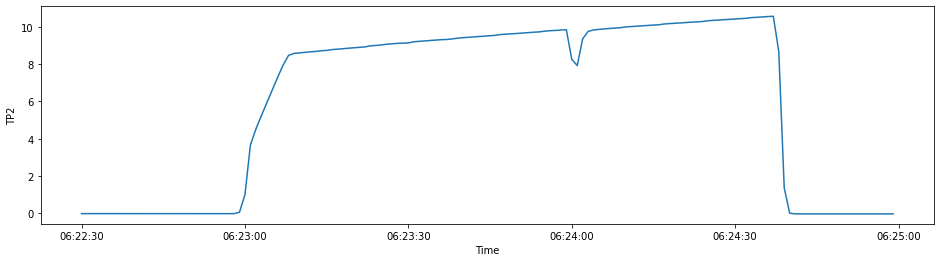

In [63]:
plt.figure(figsize = (16, 4))
plt.plot(metro[1350:1500].TP2)
plt.xlabel("Time")
plt.ylabel("TP2")
plt.show()

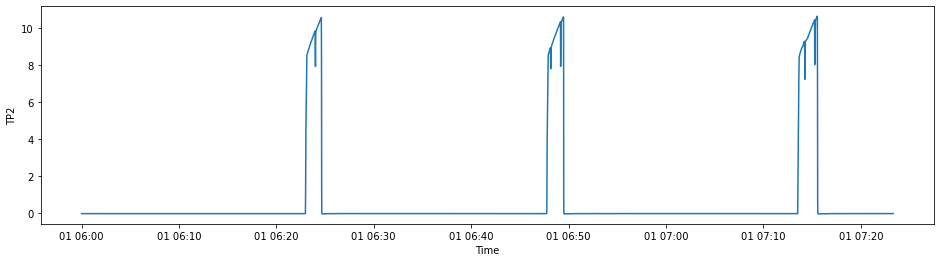

In [64]:
plt.figure(figsize = (16, 4))
plt.plot(metro[:5000].TP2)
plt.xlabel("Time")
plt.ylabel("TP2")
plt.show()